In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hypotesis = pd.read_csv('data/Bitcoin.csv')
hypotesis

,date,open,high,low,close
0,2024-04-24,66420.40,67053.77,63702.55,64317.48
1,2024-04-23,66839.89,67199.24,65864.87,66407.27
2,2024-04-22,64935.63,67233.96,64548.18,66837.68
3,2024-04-21,64992.82,65723.24,64277.72,64926.64
4,2024-04-20,63851.10,65442.46,63172.40,64994.44
...,...,...,...,...,...
3503,2014-09-21,408.08,412.43,393.18,398.82
3504,2014-09-20,394.67,423.30,389.88,408.90
3505,2014-09-19,424.10,427.83,384.53,394.80
3506,2014-09-18,456.86,456.86,413.10,424.44


In [3]:
def checkmove(row):
    if row['open'] < row['close']: 
        return 'Apreciated'
    elif row['open'] > row['close']:
        return 'Depreciated'
    else:
        return 'Depreciated'
    
hypotesis['movement'] = hypotesis.apply(checkmove, axis=1)

In [4]:
hypotesis.drop(columns= ['date']).groupby('movement').agg(['count', 'mean'])

open                high                 low               close  \
            count          mean count          mean count          mean count   
movement                                                                        
Apreciated   1858  15240.782363  1858  15793.496997  1858  15067.251432  1858   
Depreciated  1650  16713.027382  1650  16883.234588  1650  16061.087715  1650   

                           
                     mean  
movement                   
Apreciated   15631.101523  
Depreciated  16309.525236

In [5]:
def percentege(row):
    theper = (((row['close']-row['open'])/row['open'])*100)
    return round(theper, 2)
hypotesis['percent'] = hypotesis.apply(percentege, axis=1)

In [6]:
hypotesis['date'] = hypotesis['date'].apply(pd.to_datetime)

In [7]:
hypotesis['week_day'] = hypotesis['date'].dt.day_name()

In [8]:
outOfCurve = hypotesis[hypotesis['percent'] > 10]
display(outOfCurve)
len(hypotesis[hypotesis['percent'] > 10])

,date,open,high,low,close,movement,percent,week_day
531,2022-11-10,15883.16,18054.31,15834.02,17586.77,Apreciated,10.73,Thursday
593,2022-09-09,19328.14,21439.41,19310.96,21381.15,Apreciated,10.62,Friday
786,2022-02-28,37706.00,43760.46,37518.21,43193.23,Apreciated,14.55,Monday
810,2022-02-04,37149.27,41527.79,37093.63,41500.88,Apreciated,11.71,Friday
1050,2021-06-09,33416.98,37537.37,32475.87,37345.12,Apreciated,11.75,Wednesday
1066,2021-05-24,34700.36,39835.14,34551.08,38705.98,Apreciated,11.54,Monday
1070,2021-05-20,36753.67,42462.98,35050.62,40782.74,Apreciated,10.96,Thursday
1094,2021-04-26,49077.79,54288.00,48852.80,54021.75,Apreciated,10.07,Monday
1171,2021-02-08,38886.83,46203.93,38076.32,46196.46,Apreciated,18.80,Monday
1197,2021-01-13,33915.12,37599.96,32584.67,37316.36,Apreciated,10.03,Wednesday


50

In [9]:
outOfCurve.groupby('week_day').agg('count')

,date,open,high,low,close,movement,percent
week_day,,,,,,,
Friday,7,7,7,7,7,7,7
Monday,11,11,11,11,11,11,11
Saturday,4,4,4,4,4,4,4
Sunday,2,2,2,2,2,2,2
Thursday,11,11,11,11,11,11,11
Tuesday,3,3,3,3,3,3,3
Wednesday,12,12,12,12,12,12,12


In [10]:
moveToWeek = hypotesis.groupby(['week_day','movement']).agg('count')['close']
display(moveToWeek)
(moveToWeek.loc['Friday','Apreciated']/len(hypotesis))*100

week_day   movement   
Friday     Apreciated     276
           Depreciated    225
Monday     Apreciated     272
           Depreciated    229
Saturday   Apreciated     278
           Depreciated    223
Sunday     Apreciated     255
           Depreciated    246
Thursday   Apreciated     254
           Depreciated    247
Tuesday    Apreciated     265
           Depreciated    236
Wednesday  Apreciated     258
           Depreciated    244
Name: close, dtype: int64

7.8677309007981755

In [11]:
hypotesis.groupby('movement').agg('count')['close']['Apreciated']

1858

In [12]:
depreciated = {}
apreciated = {}
key = 0
for i in moveToWeek.items():
    toWhole = ((moveToWeek[i[0]]/len(hypotesis))*100)
    if i[0][1] == 'Apreciated':
        toMove = ((moveToWeek[i[0]]/(hypotesis.groupby('movement').agg('count')['close'][i[0][1]]))*100)
        apreciated[key] = {i[0][0]: round(toWhole, 2),
                           'To Move': round(toMove, 2)
                           }
    elif i[0][1] == 'Same':
        continue
    else:
        toMove = ((moveToWeek[i[0]]/(hypotesis.groupby('movement').agg('count')['close'][i[0][1]]))*100)
        depreciated[key] = {i[0][0]: round(toWhole, 2),
                           'To Move': round(toMove, 2)
                           }
    key+=1
        
display(apreciated)
display(depreciated)

{0: {'Friday': 7.87, 'To Move': 14.85},
 2: {'Monday': 7.75, 'To Move': 14.64},
 4: {'Saturday': 7.92, 'To Move': 14.96},
 6: {'Sunday': 7.27, 'To Move': 13.72},
 8: {'Thursday': 7.24, 'To Move': 13.67},
 10: {'Tuesday': 7.55, 'To Move': 14.26},
 12: {'Wednesday': 7.35, 'To Move': 13.89}}

{1: {'Friday': 6.41, 'To Move': 13.64},
 3: {'Monday': 6.53, 'To Move': 13.88},
 5: {'Saturday': 6.36, 'To Move': 13.52},
 7: {'Sunday': 7.01, 'To Move': 14.91},
 9: {'Thursday': 7.04, 'To Move': 14.97},
 11: {'Tuesday': 6.73, 'To Move': 14.3},
 13: {'Wednesday': 6.96, 'To Move': 14.79}}

date
Jan     -4.69
Feb    153.84
Mar     14.28
Apr     92.72
Mai     54.10
Jun     27.00
Jul     93.38
Aug      2.56
Set    -36.65
Oct    173.85
Nov     51.05
Dez     86.67
Name: percent, dtype: float64

Text(0, 0.5, 'Aggregated %')

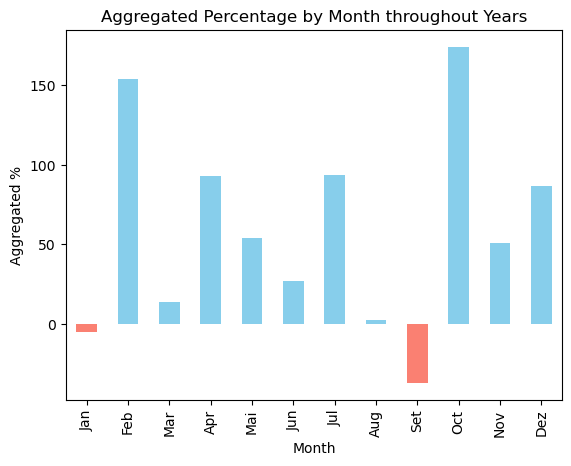

In [13]:
monthTotal = hypotesis.groupby(hypotesis.date.dt.month)['percent'].agg('sum')
month = hypotesis.groupby(hypotesis.date.dt.month)['percent'].agg('mean')
monthTotal = monthTotal.rename(index={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Set', 10:'Oct', 11:'Nov', 12:'Dez'})
month = month.rename(index={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Set', 10:'Oct', 11:'Nov', 12:'Dez'})
display(monthTotal)


monthTotal.plot(kind='bar', color=['skyblue' if i >= 0 else 'salmon' for i in monthTotal])
plt.title('Aggregated Percentage by Month throughout Years')
plt.xlabel('Month')
plt.ylabel('Aggregated %')

date
Jan    -1.512903
Feb    54.360424
Mar     4.606452
Apr    31.537415
Mai    19.390681
Jun    10.000000
Jul    33.469534
Aug     0.917563
Set   -12.904930
Oct    56.080645
Nov    17.016667
Dez    27.958065
Name: percent, dtype: float64

Text(0, 0.5, 'Mean of %')

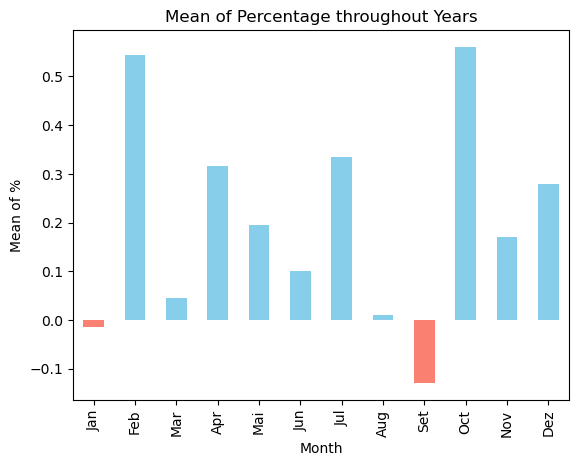

In [14]:
display(month.apply(lambda x: x*100))

month.plot(kind='bar', color=['skyblue' if i >= 0 else 'salmon' for i in month])
plt.title('Mean of Percentage throughout Years')
plt.xlabel('Month')
plt.ylabel('Mean of %')

In [15]:
hypotesis['day'] = hypotesis['date'].dt.day
hypotesis['month'] = hypotesis['date'].dt.month
hypotesis['year'] = hypotesis['date'].dt.year
hypotesis

,date,open,high,low,close,movement,percent,week_day,day,month,year
0,2024-04-24,66420.40,67053.77,63702.55,64317.48,Depreciated,-3.17,Wednesday,24,4,2024
1,2024-04-23,66839.89,67199.24,65864.87,66407.27,Depreciated,-0.65,Tuesday,23,4,2024
2,2024-04-22,64935.63,67233.96,64548.18,66837.68,Apreciated,2.93,Monday,22,4,2024
3,2024-04-21,64992.82,65723.24,64277.72,64926.64,Depreciated,-0.10,Sunday,21,4,2024
4,2024-04-20,63851.10,65442.46,63172.40,64994.44,Apreciated,1.79,Saturday,20,4,2024
...,...,...,...,...,...,...,...,...,...,...,...
3503,2014-09-21,408.08,412.43,393.18,398.82,Depreciated,-2.27,Sunday,21,9,2014
3504,2014-09-20,394.67,423.30,389.88,408.90,Apreciated,3.61,Saturday,20,9,2014
3505,2014-09-19,424.10,427.83,384.53,394.80,Depreciated,-6.91,Friday,19,9,2014
3506,2014-09-18,456.86,456.86,413.10,424.44,Depreciated,-7.10,Thursday,18,9,2014


In [16]:
maxMonth = hypotesis.groupby(['year', 'month'])['high'].agg('max').reset_index()
maxMonth

,year,month,high
0,2014,9,468.17
1,2014,10,411.70
2,2014,11,457.09
3,2014,12,384.04
4,2015,1,320.43
...,...,...,...
111,2023,12,44705.52
112,2024,1,48969.37
113,2024,2,63913.13
114,2024,3,73750.07


In [17]:
maxYear = maxMonth.groupby('year')['high'].idxmax()
maxYear

year
2014      0
2015     14
2016     27
2017     39
2018     40
2019     57
2020     75
2021     86
2022     90
2023    111
2024    114
Name: high, dtype: int64

12    36.363636
11    18.181818
3     18.181818
9      9.090909
1      9.090909
6      9.090909
Name: month, dtype: float64

<Figure size 800x600 with 0 Axes>

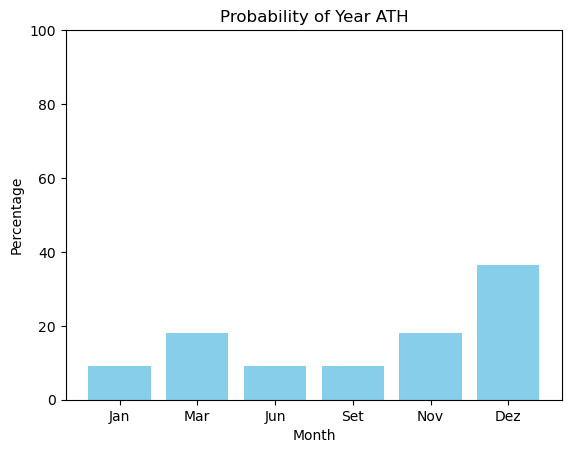

<Figure size 800x600 with 0 Axes>

In [18]:
showWhichMonth = maxMonth.loc[maxYear]


#show which month in a certain year is the highest value
percentmax = (showWhichMonth['month'].value_counts()/ len(showWhichMonth))*100
display(percentmax)

percentmax = percentmax.rename(index={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Set', 10:'Oct', 11:'Nov', 12:'Dez'})

x = percentmax.reset_index() 

desired_order = ['Jan', 'Mar', 'Jun', 'Set', 'Nov', 'Dez']
day_series_sorted = percentmax.reindex(desired_order)
x = day_series_sorted
x = x.reset_index()
x.columns = ["month", "percentage"]
x

plt.bar(x['month'], height= x['percentage'], color='skyblue')
plt.title('Probability of Year ATH')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.figure(figsize=(8, 6))



In [19]:
minMonth = hypotesis.groupby(['year', 'month'])['low'].agg('min').reset_index()
minMonth

,year,month,low
0,2014,9,372.24
1,2014,10,289.30
2,2014,11,320.63
3,2014,12,304.23
4,2015,1,171.51
...,...,...,...
111,2023,12,37629.36
112,2024,1,38521.89
113,2024,2,41879.19
114,2024,3,59323.91


In [20]:
minYear = minMonth.groupby('year')['low'].idxmin()
minYear

year
2014      1
2015      4
2016     16
2017     28
2018     51
2019     53
2020     66
2021     76
2022     98
2023    100
2024    112
Name: low, dtype: int64

,year,month,low
1,2014,10,289.30
4,2015,1,171.51
16,2016,1,354.91
28,2017,1,755.76
51,2018,12,3191.30
53,2019,2,3391.02
66,2020,3,4106.98
76,2021,1,28722.76
98,2022,11,15599.05
100,2023,1,16521.23


1     54.545455
10     9.090909
12     9.090909
2      9.090909
3      9.090909
11     9.090909
Name: month, dtype: float64

<Figure size 800x600 with 0 Axes>

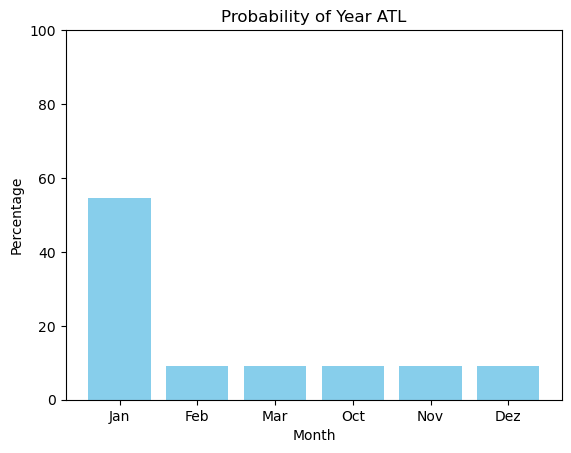

<Figure size 800x600 with 0 Axes>

In [21]:
whichMonth = minMonth.loc[minYear]
display(whichMonth)
#show which month in a certain year is the lowest value
percentages = (whichMonth['month'].value_counts()/ len(whichMonth))*100
display(percentages)

percentages = percentages.rename(index={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Set', 10:'Oct', 11:'Nov', 12:'Dez'})

a = percentages.reset_index() 

desired_order = ['Jan', 'Feb', 'Mar', 'Oct', 'Nov', 'Dez']
day_series_sorted = percentages.reindex(desired_order)
a = day_series_sorted
a = a.reset_index()
a.columns = ["month", "percentage"]

plt.bar(a['month'], height= a['percentage'], color='skyblue')
plt.title('Probability of Year ATL')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.figure(figsize=(8, 6))


In [22]:
hypotesis

,date,open,high,low,close,movement,percent,week_day,day,month,year
0,2024-04-24,66420.40,67053.77,63702.55,64317.48,Depreciated,-3.17,Wednesday,24,4,2024
1,2024-04-23,66839.89,67199.24,65864.87,66407.27,Depreciated,-0.65,Tuesday,23,4,2024
2,2024-04-22,64935.63,67233.96,64548.18,66837.68,Apreciated,2.93,Monday,22,4,2024
3,2024-04-21,64992.82,65723.24,64277.72,64926.64,Depreciated,-0.10,Sunday,21,4,2024
4,2024-04-20,63851.10,65442.46,63172.40,64994.44,Apreciated,1.79,Saturday,20,4,2024
...,...,...,...,...,...,...,...,...,...,...,...
3503,2014-09-21,408.08,412.43,393.18,398.82,Depreciated,-2.27,Sunday,21,9,2014
3504,2014-09-20,394.67,423.30,389.88,408.90,Apreciated,3.61,Saturday,20,9,2014
3505,2014-09-19,424.10,427.83,384.53,394.80,Depreciated,-6.91,Friday,19,9,2014
3506,2014-09-18,456.86,456.86,413.10,424.44,Depreciated,-7.10,Thursday,18,9,2014


In [23]:
feature = hypotesis.drop(columns=['date', 'week_day'])
feature = pd.get_dummies(feature, columns=['movement'], prefix= 'mov')

In [24]:
feature.drop(columns=['mov_Depreciated'], inplace=True)
feature = feature.sort_index(ascending=False).reset_index()

feature


,index,open,high,low,close,percent,day,month,year,mov_Apreciated
0,3507,465.86,468.17,452.42,457.33,-1.83,17,9,2014,0
1,3506,456.86,456.86,413.10,424.44,-7.10,18,9,2014,0
2,3505,424.10,427.83,384.53,394.80,-6.91,19,9,2014,0
3,3504,394.67,423.30,389.88,408.90,3.61,20,9,2014,1
4,3503,408.08,412.43,393.18,398.82,-2.27,21,9,2014,0
...,...,...,...,...,...,...,...,...,...,...
3503,4,63851.10,65442.46,63172.40,64994.44,1.79,20,4,2024,1
3504,3,64992.82,65723.24,64277.72,64926.64,-0.10,21,4,2024,0
3505,2,64935.63,67233.96,64548.18,66837.68,2.93,22,4,2024,1
3506,1,66839.89,67199.24,65864.87,66407.27,-0.65,23,4,2024,0


In [25]:
feature = feature.drop(columns=['index', 'mov_Apreciated'])
feature

,open,high,low,close,percent,day,month,year
0,465.86,468.17,452.42,457.33,-1.83,17,9,2014
1,456.86,456.86,413.10,424.44,-7.10,18,9,2014
2,424.10,427.83,384.53,394.80,-6.91,19,9,2014
3,394.67,423.30,389.88,408.90,3.61,20,9,2014
4,408.08,412.43,393.18,398.82,-2.27,21,9,2014
...,...,...,...,...,...,...,...,...
3503,63851.10,65442.46,63172.40,64994.44,1.79,20,4,2024
3504,64992.82,65723.24,64277.72,64926.64,-0.10,21,4,2024
3505,64935.63,67233.96,64548.18,66837.68,2.93,22,4,2024
3506,66839.89,67199.24,65864.87,66407.27,-0.65,23,4,2024


In [26]:
target = feature['close'].shift(-1)
target.fillna(64495.92,inplace=True)
target

0         424.44
1         394.80
2         408.90
3         398.82
4         402.15
          ...   
3503    64926.64
3504    66837.68
3505    66407.27
3506    64317.48
3507    64495.92
Name: close, Length: 3508, dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


def doLinear(df, target):
    # Making the data be in order
    splitIndex = int(len(df) * 0.80)
    training = df.iloc[:splitIndex]
    testing = df.iloc[splitIndex:]
    trainingT = target.iloc[:splitIndex]
    testingT = target.iloc[splitIndex:]
    
    # Standardazing the data
    stand = StandardScaler()
    stand.fit(training)
    xtrainStandard = stand.transform(training)
    xtestStandard = stand.transform(testing)

    # Liner Regression setup and Training
    model = LinearRegression()
    model.fit(xtrainStandard, trainingT)

    # Evaluating tests
    r2 = model.score(xtestStandard, testingT)
    retest = model.score(xtrainStandard, trainingT)
    pred = model.predict(xtestStandard)
    mean = mean_squared_error(pred, testingT, squared=False)

    plt.plot(pred, color = "blue")
    plt.plot(testingT, color = "orange")
    plt.xticks(rotation=45)
    

    # Printing resuls
    return plt.show(), {
        'R2 Score': r2,
        'Overfiting Test': retest - r2,
        'Train Value': retest,
        'Mean': mean
    }


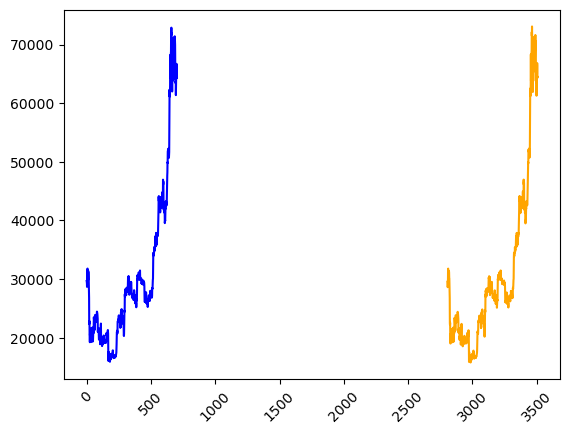

(None,
 {'R2 Score': 0.9947792449449483,
  'Overfiting Test': 0.002911951977728866,
  'Train Value': 0.9976911969226772,
  'Mean': 983.8962591272767})

In [28]:
doLinear(feature, target)  # Good results but doubtble, can lead to overfitting quickly

In [34]:
arimaDf = hypotesis[['date', 'close']]

arimaDf

,date,close
0,2024-04-24,64317.48
1,2024-04-23,66407.27
2,2024-04-22,66837.68
3,2024-04-21,64926.64
4,2024-04-20,64994.44
...,...,...
3503,2014-09-21,398.82
3504,2014-09-20,408.90
3505,2014-09-19,394.80
3506,2014-09-18,424.44


In [36]:
arimaDf.index = pd.DatetimeIndex(hypotesis['date'])
arimaDf = arimaDf.sort_index(ascending=True)
arimaDf.drop(columns='date', inplace=True)
arimaDf

,close
date,
2014-09-17,64317.48
2014-09-18,66407.27
2014-09-19,66837.68
2014-09-20,64926.64
2014-09-21,64994.44
...,...
2024-04-20,398.82
2024-04-21,408.90
2024-04-22,394.80


In [37]:
arimaDf[:-1]

,close
date,
2014-09-17,64317.48
2014-09-18,66407.27
2014-09-19,66837.68
2014-09-20,64926.64
2014-09-21,64994.44
...,...
2024-04-19,402.15
2024-04-20,398.82
2024-04-21,408.90


In [38]:
from pmdarima import auto_arima

auto_arima(arimaDf, seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57186.526, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57186.505, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57186.568, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57186.173, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57186.895, Time=1.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.086 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(arimaDf[:-1], order = (1,1,1), seasonal_order= (0,0,0,0))
model_fit1 = model1.fit()
pred = model_fit1.predict(start=len(arimaDf), end=len(arimaDf))

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [40]:
print( mean_squared_error(pred, arimaDf[-1:], squared=False))

pred, arimaDf[-1:]

# few data points makes it hard to get a good predictions

32.910068668041106


(2024-04-25    424.419931
 Freq: D, dtype: float64,
              close
 date              
 2024-04-24  457.33)